<a href="https://colab.research.google.com/github/DorotaJanosz/machine-learning-bootcamp/blob/master/supervised/02_regression/06_decision_tree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import sklearn

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)

###Wygenerowanie danych

In [14]:
data, target = make_regression(n_samples=100, n_features=1, noise=20)
target = target**2

print(data[:5],'\n')
print(target[:5])

[[ 0.93128 ]
 [ 0.087047]
 [-1.057711]
 [ 0.314247]
 [-0.479174]] 

[3929.685294  564.72678   659.809938   62.987342  239.490931]


###Regresja liniowa

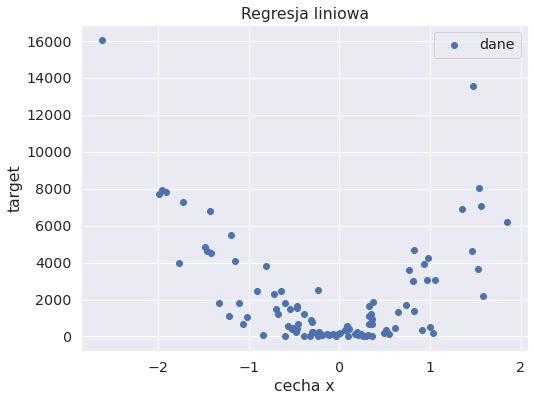

In [15]:
plt.figure(figsize=(8,6))
plt.xlabel('cecha x')
plt.ylabel('target')
plt.title('Regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.show()

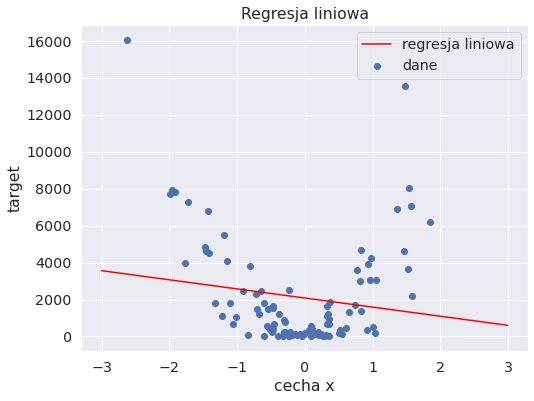

In [20]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data, target)

plot_data = np.arange(-3, 3, 0.01).reshape(-1, 1)


y_pred = regressor.predict(plot_data)

plt.figure(figsize=(8,6))
plt.xlabel('cecha x')
plt.ylabel('target')
plt.title('Regresja liniowa')
plt.scatter(data, target, label='dane')
plt.plot(plot_data, y_pred, color='red', label='regresja liniowa')
plt.legend()
plt.show()


###Regresja drzew decyzyjnych

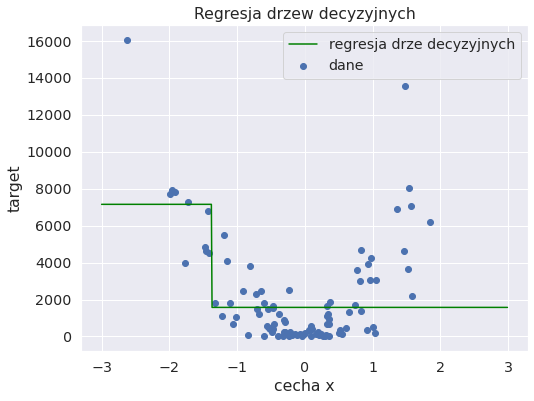

In [26]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 1
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data, target)

plot_data = np.arange(-3, 3, 0.01).reshape(-1, 1) 
y_pred = regressor.predict(plot_data)

plt.figure(figsize=(8,6))
plt.xlabel('cecha x')
plt.ylabel('target')
plt.title('Regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.plot(plot_data, y_pred, color='green', label='regresja drze decyzyjnych')
plt.legend()
plt.show()

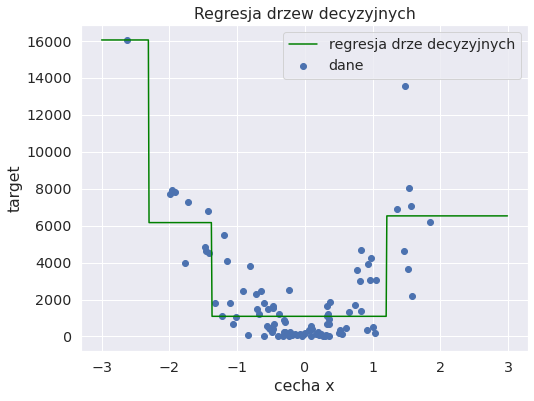

In [27]:
max_depth = 2
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data, target)

plot_data = np.arange(-3, 3, 0.01).reshape(-1, 1)
y_pred = regressor.predict(plot_data)

plt.figure(figsize=(8,6))
plt.xlabel('cecha x')
plt.ylabel('target')
plt.title('Regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.plot(plot_data, y_pred, color='green', label='regresja drze decyzyjnych')
plt.legend()
plt.show()

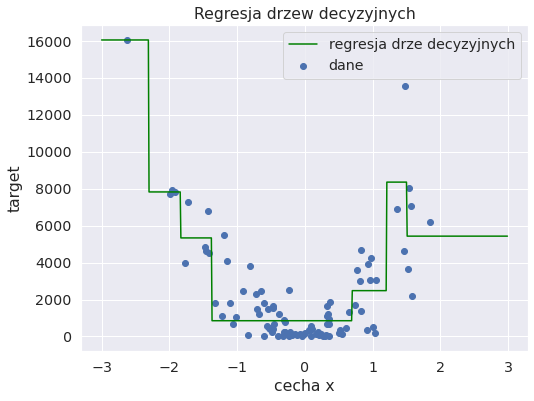

In [28]:
max_depth = 3
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data, target)

plot_data = np.arange(-3, 3, 0.01).reshape(-1, 1)
y_pred = regressor.predict(plot_data)

plt.figure(figsize=(8,6))
plt.xlabel('cecha x')
plt.ylabel('target')
plt.title('Regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.plot(plot_data, y_pred, color='green', label='regresja drze decyzyjnych')
plt.legend()
plt.show()

###Graf drzewa decyzyjnego

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


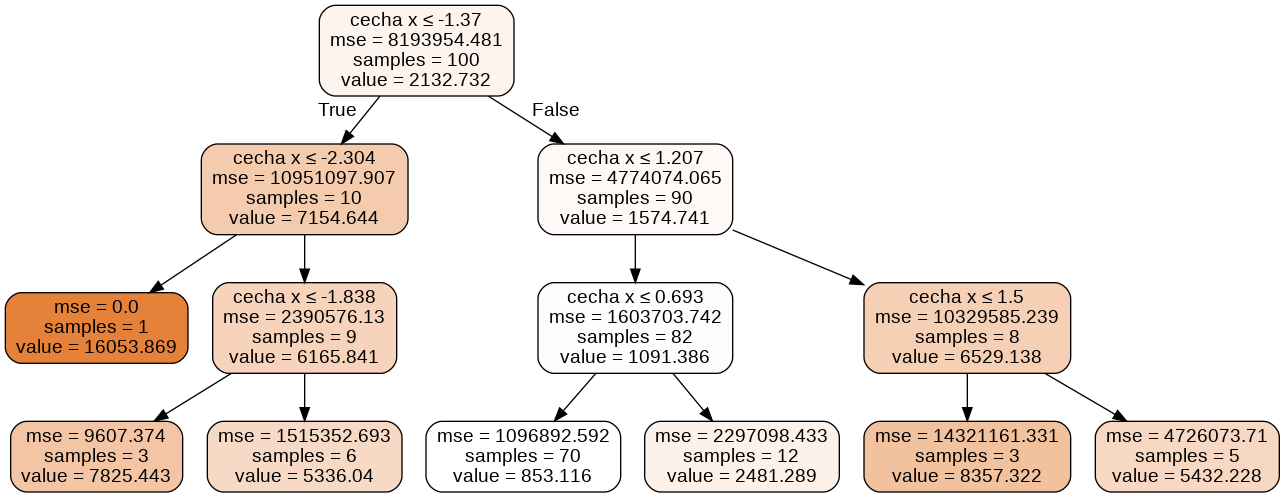

In [29]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=['cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(graph.create_png(), width=600)



###Model drzewa decyzyjnego - budowa funkcji

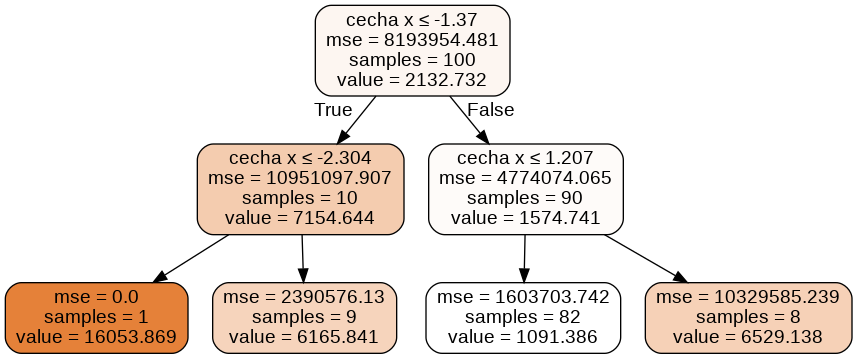

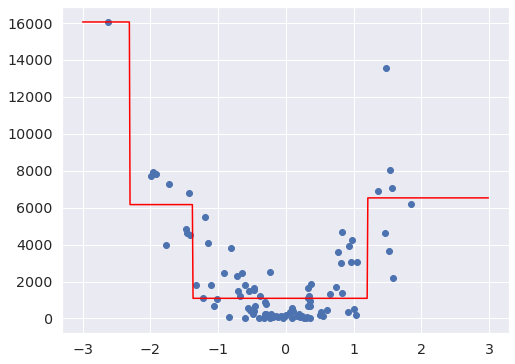

In [30]:
def make_dt_regression(max_depth=2):
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(data, target)

    plt.figure(figsize=(8, 6))
    plt.plot(plot_data, regressor.predict(plot_data), c='red')
    plt.scatter(data, target)

    dot_data = StringIO()
    export_graphviz(regressor, out_file=dot_data,
                   filled=True, rounded=True,
                   special_characters=True,
                   feature_names=['cecha x'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    return Image(graph.create_png(), width=300 + max_depth * 100)
    
make_dt_regression(max_depth=2)

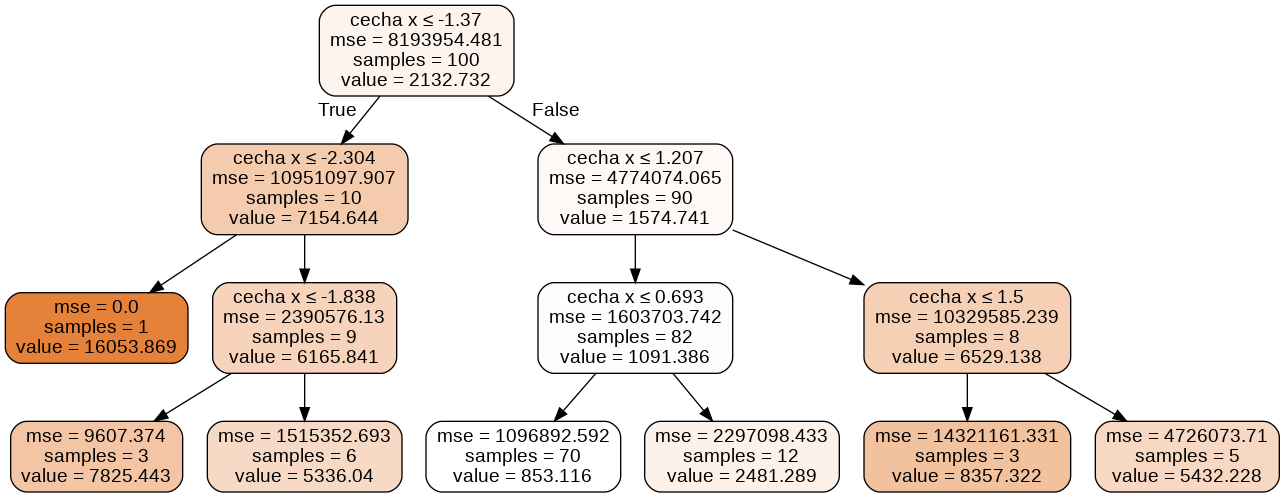

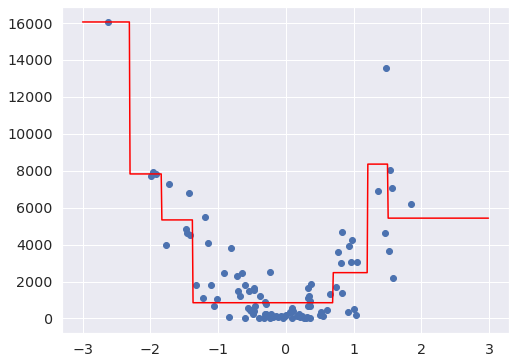

In [31]:
make_dt_regression(max_depth=3)

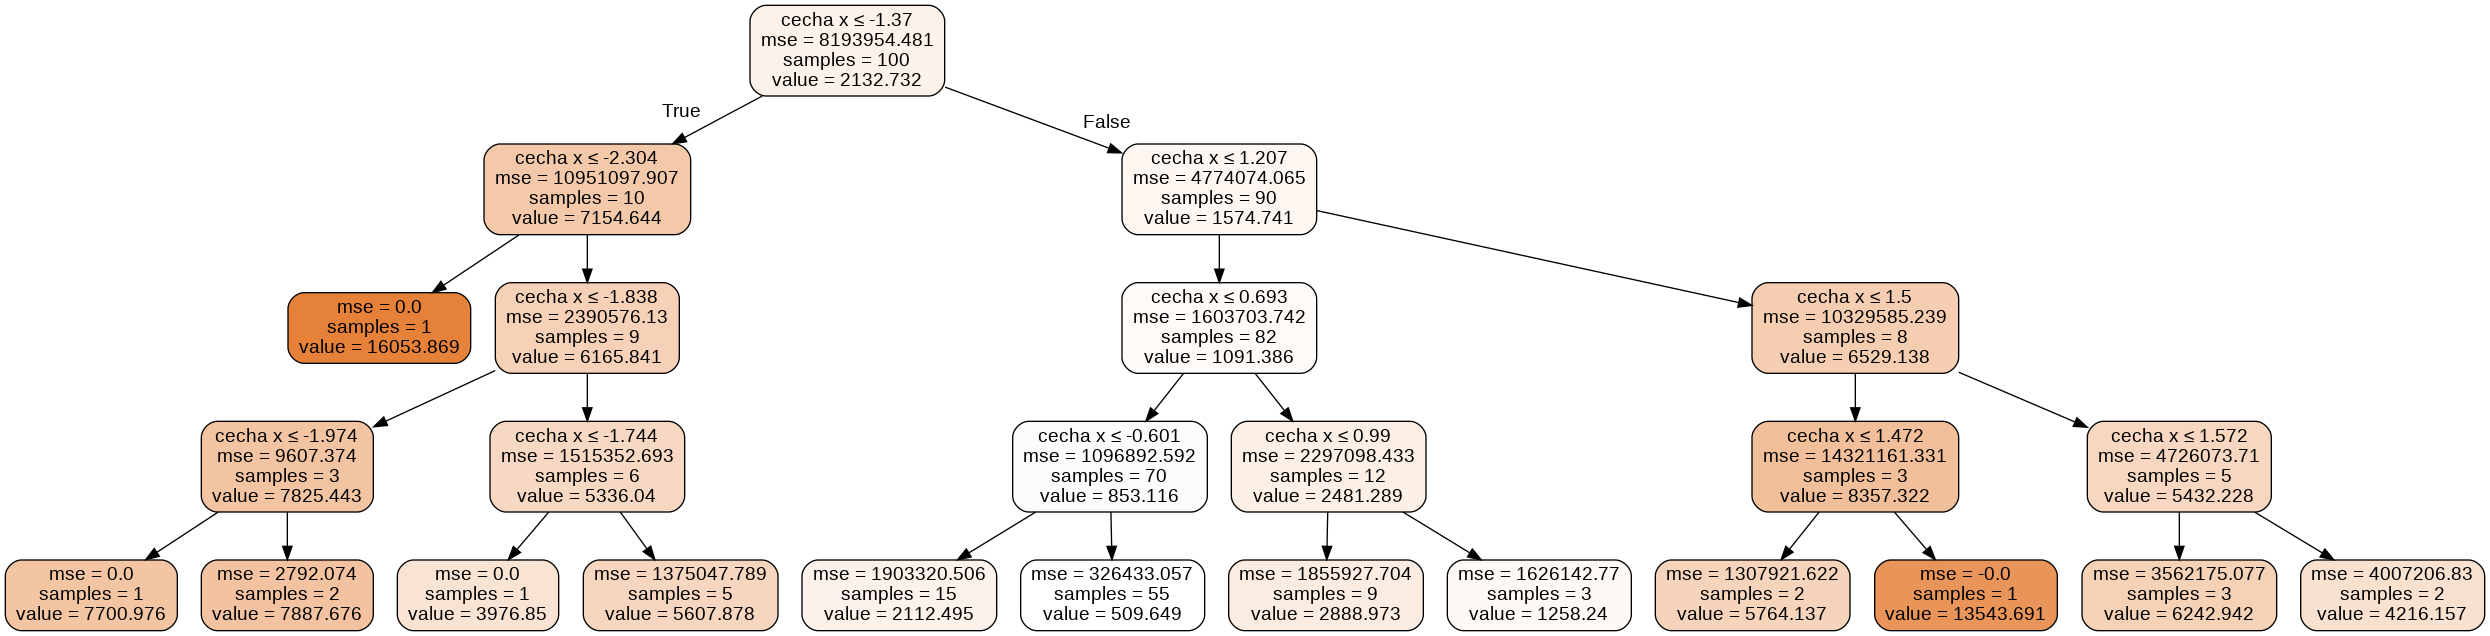

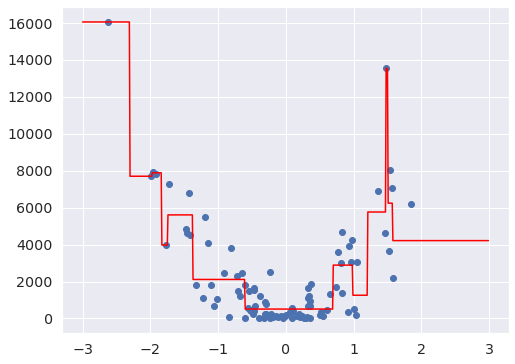

In [32]:
make_dt_regression(max_depth=4)